### Linear fit example as a stub

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from pprint import pprint as pp

# Choose dataframe - see etl.py. Pickle files need to exist (update_pickles.py)
df_name = 'df_cases_us'

pickle_file = open(f'pickles/{df_name}''.p', 'rb')
df_raw = pickle.load(pickle_file)
pickle_file.close()

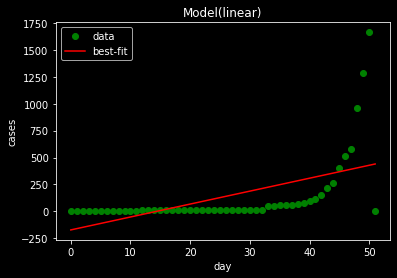

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import Model
from lmfit.models import LinearModel

# Nonlinear least squares starting point, using LinearModel
df = df_raw
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]
model = LinearModel()
params = model.make_params()
result = model.fit(df.cases, params, x=df.day.to_list())
mpl.style.use('dark_background')
result.plot_fit(xlabel='day', ylabel='cases', datafmt='og', fitfmt='r')
